<div align="center">

# Evaluación A/B el recommender_system_test: Impacto en la conversión de usuarios

</div>

**Introducción**

En el competitivo mundo del comercio electrónico, optimizar la conversión de usuarios en clientes será fundamental para el éxito de una tienda en línea. Para evaluar la efectividad de un nuevo sistema de recomendaciones de productos, se realizará un experimento A/B con un subconjunto de usuarios europeos. El objetivo será medir el impacto del nuevo sistema en la tasa de conversión en diferentes etapas del embudo de ventas: de la página del producto al carrito y de este a la compra final.

**Objetivo**

El objetivo principal de este estudio será determinar si el nuevo sistema de recomendaciones mejora la conversión de usuarios en cada etapa del embudo de ventas en al menos un 10%, comparando los resultados entre el grupo de control (A) y el grupo de prueba (B).


**Etapas de Desarrollo**

1. Análisis Exploratorio de Datos (EDA):

Se evaluará la conversión en cada etapa del embudo (página del producto → carrito → compra).
Se revisarán los tipos de datos, valores ausentes y duplicados.
Se analizará la distribución de eventos y se verificará que los usuarios estén correctamente asignados a un solo grupo.


2. Evaluación de la correcta ejecución del experimento:

Se compararán las distribuciones demográficas entre grupos.
Se verificará la duración del experimento (7 de diciembre de 2020 al 1 de enero de 2021).
Se analizará la aleatorización y la presencia equitativa de usuarios en ambos grupos.


3. Prueba Estadística:

Se utilizará la prueba z para comparar tasas de conversión entre los grupos A y B.
Se calculará la significancia estadística y los valores p para determinar diferencias significativas.


**Conclusiones y recomendaciones:**

Tras el análisis estadístico, se determinará si el nuevo sistema de recomendaciones mejora significativamente la conversión en cada etapa del embudo. En caso de que se alcance o supere el objetivo del 10%, se considerará la implementación del nuevo sistema a gran escala. Si los resultados no son concluyentes o no se observa una mejora significativa, se revisará la estrategia antes de una implementación completa y se emitiran recomendaciones en cualquiera de los casos que pueda resultar del análisis.



In [4]:
# Importamos las librerías que usaremos 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import datetime as dt
from scipy.stats import mannwhitneyu
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

In [5]:
# Cargamos los data sets que utilizaremos 
marketing_events = pd.read_csv('ab_project_marketing_events_us.csv')
new_users = pd.read_csv('final_ab_new_users_upd_us.csv')
participants = pd.read_csv('final_ab_participants_upd_us.csv')
events = pd.read_csv('final_ab_events_upd_us.csv')

Analizaremos la información contenida en cada conjunto de datos, comenzando por examinar el dataset de marketing_events.

In [7]:
marketing_events

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


In [8]:
# Analizamos la informacion del DF marketing_events 
marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 580.0+ bytes


In [9]:
# Analizamos los datos estadísticos del DF marketing_events 
marketing_events.describe()

,name,regions,start_dt,finish_dt
count,14,14,14,14
unique,14,6,14,14
top,Christmas&New Year Promo,APAC,2020-12-25,2021-01-03
freq,1,4,1,1


In [10]:
# Verificamos que no tenga valores nulos el DF marketing_events 
marketing_events.isna().sum()

name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64

In [11]:
# Verificamos que no tenga valores duplicados
marketing_events.duplicated().sum()

0

In [12]:
# Convertimos las columnas 'start_dt' y 'finish_dt' a formato datetime
marketing_events['start_dt'] = pd.to_datetime(marketing_events['start_dt'], format='%Y-%m-%d')
marketing_events['finish_dt'] = pd.to_datetime(marketing_events['finish_dt'], format='%Y-%m-%d')

# Corroboramos que se haya realizado el cambio
marketing_events.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 580.0+ bytes




Procedemos a analizar el DataFrame new_users.


In [14]:
# Imprimimos las primeras filas para analizar las columnas del DF new_users
new_users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [15]:
# Analizamos la informacion del DF new_users 
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [16]:
# Observamos los datos estadísticos 
new_users.describe()

,user_id,first_date,region,device
count,58703,58703,58703,58703
unique,58703,17,4,4
top,D72A72121175D8BE,2020-12-21,EU,Android
freq,1,6077,43396,26159


In [17]:
# Verificamos que no tenga valores nulos
new_users.isna().sum()

user_id       0
first_date    0
region        0
device        0
dtype: int64

In [18]:
# Verificamos que no tenga valores duplicados
new_users.duplicated().sum()

0

In [19]:
# Convertimos la columna 'first_date' a formato datetime de DF new_users
new_users['first_date'] = pd.to_datetime(new_users['first_date'],format= '%Y-%m-%d')
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  object        
 3   device      58703 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ MB


Procedemos a analizar el DataFrame participants.

In [21]:
# Mostramos las primeras filas del DF participants para analizar sus columnas.
participants.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


In [22]:
# Analizamos la informacion del DF participants 
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


In [23]:
# Analizamos los datos estadísticos
participants.describe()

,user_id,group,ab_test
count,14525,14525,14525
unique,13638,2,2
top,307C06C0E6F09B93,A,interface_eu_test
freq,2,8214,10850


In [24]:
# Verificamos que no tenga valores nulos
participants.isna().sum()

user_id    0
group      0
ab_test    0
dtype: int64

In [25]:
# Verificamos que no tenga valores duplicados
participants.duplicated().sum()

0

Continuamos con el análisis del DataFrame events.

In [27]:
# Mostramos las primeras filas del DF events
events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [28]:
# Analizamos la informacion del DF events 
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


In [29]:
# Analizamos los datos estadísticos
events.describe()

,details
count,60314.000000
mean,23.881219
std,72.228884
min,4.990000
25%,4.990000
50%,4.990000
75%,9.990000
max,499.990000


In [30]:
# Verificamos que no tenga valores nulos
events.isna().sum()

user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64

In [31]:
# Verificamos que no tenga valores duplicados
events.duplicated().sum()

0

In [32]:
# Convertimos la columna 'event_dt' a formato datetime del DF events.
events['event_dt'] = pd.to_datetime(events['event_dt']).dt.floor('D')
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     60314 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 12.9+ MB


<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
Al analizar los DataFrames, observamos que todas las columnas tienen nombres claros y están en minúsculas, lo que facilita su comprensión. Además, se corrigieron los formatos de las fechas y se verificó que no existieran datos nulos o duplicados. Estas acciones contribuirán a un desarrollo más sólido y preciso del análisis.

In [34]:
# Distribución de usuarios por test o experimento, contando los usuarios por grupo de 'ab_test'
participants.groupby('ab_test').count()

,user_id,group
ab_test,,
interface_eu_test,10850,10850
recommender_system_test,3675,3675


In [35]:
# Distribución de usuarios por test o experimento y por grupo, 
# contando las ocurrencias por combinación de 'group' y 'ab_test'
participants.groupby(['group', 'ab_test']).count()

user_id
group ab_test                         
A     interface_eu_test           5467
      recommender_system_test     2747
B     interface_eu_test           5383
      recommender_system_test      928

#### ¿Hay alguna peculiaridad en los datos que hay que tener en cuenta antes de iniciar la prueba A/B?
1. No contamos con información sobre el estado de los datos antes de la implementación de las intervenciones, que ocurrió el 07/12/2020.
2. No sabemos qué tan comparables eran los grupos antes de esa fecha.
3. No tenemos certeza de si los grupos fueron distribuidos de manera aleatoria.
4. El tamaño de los grupos es diferente, especialmente en el caso del grupo recommender_system_test, lo cual podría afectar la interpretación de los resultados.

A continuacion, responderemos las preguntas clave que nos permitirán determinar si la prueba se llevó a cabo correctamente.

#### ¿Hay usuarios que están presentes en ambas muestras?

Ahora vamos a determinar si existen usuarios que estén participando en ambos experimentos y si esto representa un problema que afecte los resultados del AB testing. Hay tres tipos de duplicados:

Usuarios que están en ambos experimentos pero en grupos diferentes.
Usuarios que están en ambos experimentos y en el grupo de prueba en ambos.
Usuarios que están en ambos experimentos y en el grupo de control en ambos.
Los dos primeros casos representan un problema y deben ser eliminados, ya que afectan las conclusiones del AB testing. El tercer caso no representa un problema, ya que estos usuarios no recibieron ninguna de las dos intervenciones.


In [39]:
# Recordamos el contenido de nuestro Df participants
participants.sample(5)
len(participants)

14525

In [40]:
# Filtramos los usuarios que participaron en el experimento 'recommender_system_test' 
recommender_users = participants[participants['ab_test']=='recommender_system_test'].drop(columns = 'ab_test')

# Filtramos los usuarios que participaron en el experimento 'interface_eu_test'
interface_users = participants[participants['ab_test']=='interface_eu_test'].drop(columns = 'ab_test')

In [41]:
# Participantes que están en ambos experimentos (recommender_system_test e interface_eu_test)
dup_users = recommender_users.merge(interface_users, on = 'user_id', how = 'inner')
dup_users.sample(3)

,user_id,group_x,group_y
10,EEF5EFB2D5915CF1,A,A
715,5B1F39B5D751B669,B,A
449,9A8CD4B32D7511F1,A,B


In [42]:
# Total de participantes en ambos experimentos
len(dup_users)

887

In [43]:
# Renombramos las columnas para un mejor entendimiento
dup_users = dup_users.rename(columns = {
    'group_x' : 'group_recommender_system',
    'group_y' : 'group_interface_eu'
})

In [44]:
#  Creamos una lista con los usuarios que estan en ambos experimentos y al menos en un grupo de prueba
dup_users_list = list(dup_users[
    (dup_users['group_recommender_system']== 'A') & (dup_users['group_interface_eu']=='B') |
    (dup_users['group_recommender_system']== 'B') & (dup_users['group_interface_eu']=='B') |
    (dup_users['group_recommender_system']== 'B') & (dup_users['group_interface_eu']=='A') 
]['user_id'])

In [45]:
# Eliminamos a los que resultaron de la celda anterior
participants_clean = participants[~participants['user_id'].isin(dup_users_list)]
participants_clean.sample(5)

,user_id,group,ab_test
10597,864ED76959607597,A,interface_eu_test
9589,C5991A7881CB6716,A,interface_eu_test
12010,B3841A63BC1D38C7,B,interface_eu_test
9110,26A9947574A5DD45,A,interface_eu_test
7975,412779BAB41FF529,B,interface_eu_test


In [46]:
len(participants_clean)

13431

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">

Se identificaron y eliminaron los usuarios duplicados que participaron en ambos experimentos, lo cual podría haber afectado los resultados del AB testing. Después de esta limpieza, el número de participantes se redujo a 13,431, asegurando que los datos fueran más representativos y libres de sesgos. Con esta muestra depurada, los resultados del análisis serán más confiables, y el impacto de los duplicados sobre las conclusiones del AB testing se ha minimizado.

#### ¿El número de eventos por usuario está distribuido equitativamente entre las muestras?


Con el DataFrame libre de usuarios repetidos, procedemos a calcular los eventos por usuario.

In [50]:
# Fusionamos la tabla limpia con la información de los nuevos usuarios (new_users), 
# agregando la fecha de incorporación y eliminando las columnas 'region' y 'device'.
participants_clean = participants_clean.merge(new_users, on = 'user_id', how = 'left').drop(
                    columns = ['region', 'device'])
participants_clean.head()


,user_id,group,ab_test,first_date
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07
1,A7A3664BD6242119,A,recommender_system_test,2020-12-20
2,DABC14FDDFADD29E,A,recommender_system_test,2020-12-08
3,04988C5DF189632E,A,recommender_system_test,2020-12-14
4,4FF2998A348C484F,A,recommender_system_test,2020-12-20


In [51]:
# Fusionamos la tabla limpia de participantes con la de eventos y filtramos los eventos que ocurren hasta 
# 14 días después de la incorporación de los usuarios, eliminando la columna 'diff' creada para el cálculo.
events_clean = participants_clean.merge(events, on='user_id', how='left')
events_clean['diff'] = events_clean['event_dt'] - events_clean['first_date']
events_clean = events_clean[events_clean['diff']<= '14 days'].drop(columns = 'diff')
events_clean.head()

,user_id,group,ab_test,first_date,event_dt,event_name,details
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,2020-12-07,purchase,99.99
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,2020-12-07,product_cart,NaN
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,2020-12-07,product_page,NaN
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,2020-12-07,login,NaN
4,A7A3664BD6242119,A,recommender_system_test,2020-12-20,2020-12-20,product_page,NaN


In [52]:
# Contamos el número de eventos por usuario, grupo y experimento.
events_per_user = events_clean.groupby(['user_id','group','ab_test']).size().reset_index(name='event_count')
events_per_user.head()

,user_id,group,ab_test,event_count
0,0002CE61FF2C4011,A,interface_eu_test,12
1,0010A1C096941592,A,recommender_system_test,12
2,001E72F50D1C48FA,B,interface_eu_test,6
3,002412F1EB3F6E38,A,interface_eu_test,6
4,002540BE89C930FB,A,interface_eu_test,9


In [53]:
# Resumimos el número de usuarios y eventos por experimento (ab_test) y grupo, calculando la cantidad total 
# de usuarios, la suma y el promedio de eventos por usuario en cada combinación de 'ab_test' y 'group'.
events_per_user_summary = events_per_user.groupby(['ab_test', 'group' ]).agg(
    {
        'user_id':'count', 
        'event_count':['sum', 'mean'] 
    }
).reset_index()
events_per_user_summary

ab_test group user_id event_count          
                                   count         sum      mean
0        interface_eu_test     A    5350       38238  7.147290
1        interface_eu_test     B    4951       34896  7.048273
2  recommender_system_test     A    2422       16261  6.713873
3  recommender_system_test     B     706        3807  5.392351

In [54]:
# Función para generar las gráficas resumidas
def plot_summary_graphs(events_per_user_summary):
    # Asegurándonos de que los nombres de las columnas estén correctamente formateados para la gráfica
    events_per_user_summary.columns = ['ab_test', 'group', 'user_count', 'event_count_sum', 'event_count_mean']

    # Creamos las gráficas
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Tres gráficas en una fila

    # Gráfico del número de usuarios por experimento y grupo
    sns.barplot(x='ab_test', y='user_count', hue='group', data=events_per_user_summary, ax=axes[0], errorbar=None, palette='muted')
    axes[0].set_title('Número de usuarios por experimento y grupo', fontsize=12)
    axes[0].set_xlabel('Experimento', fontsize=10)
    axes[0].set_ylabel('Número de usuarios', fontsize=10)

    # Gráfico de la suma de eventos por experimento y grupo
    sns.barplot(x='ab_test', y='event_count_sum', hue='group', data=events_per_user_summary, ax=axes[1], errorbar=None, palette='muted')
    axes[1].set_title('Suma de eventos por experimento y grupo', fontsize=12)
    axes[1].set_xlabel('Experimento', fontsize=10)
    axes[1].set_ylabel('Suma de eventos', fontsize=10)

    # Gráfico del promedio de eventos por usuario
    sns.barplot(x='ab_test', y='event_count_mean', hue='group', data=events_per_user_summary, ax=axes[2], errorbar=None, palette='muted')
    axes[2].set_title('Promedio de eventos por usuario', fontsize=12)
    axes[2].set_xlabel('Experimento', fontsize=10)
    axes[2].set_ylabel('Promedio de eventos por usuario', fontsize=10)

    # Ajustamos el layout para que todo encaje bien y mostramos
    plt.tight_layout()
    plt.show()

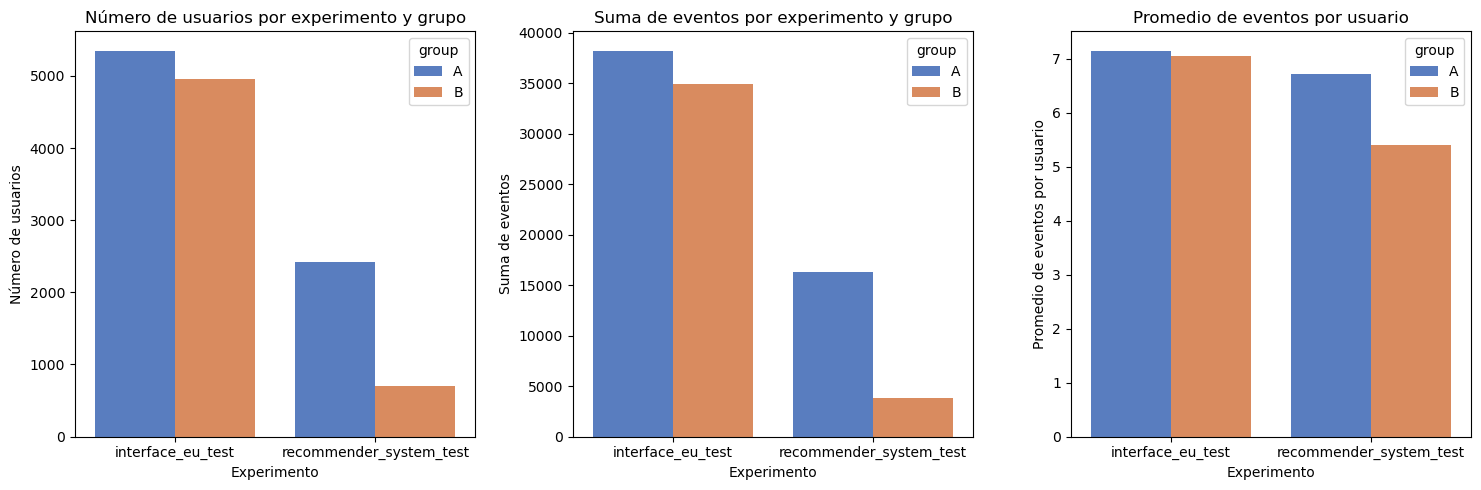

In [55]:
# Llamamos a la función para mostrar las gráficas
plot_summary_graphs(events_per_user_summary)

In [56]:
# Filtramos datos por experiento 'recommender_system_test'
experiment_recommender = events_per_user[events_per_user['ab_test'] == "recommender_system_test"]
experiment_recommender.head()

,user_id,group,ab_test,event_count
1,0010A1C096941592,A,recommender_system_test,12
8,00341D8401F0F665,A,recommender_system_test,2
10,003DF44D7589BBD4,A,recommender_system_test,15
13,00505E15A9D81546,A,recommender_system_test,5
17,005E096DBD379BCF,B,recommender_system_test,4


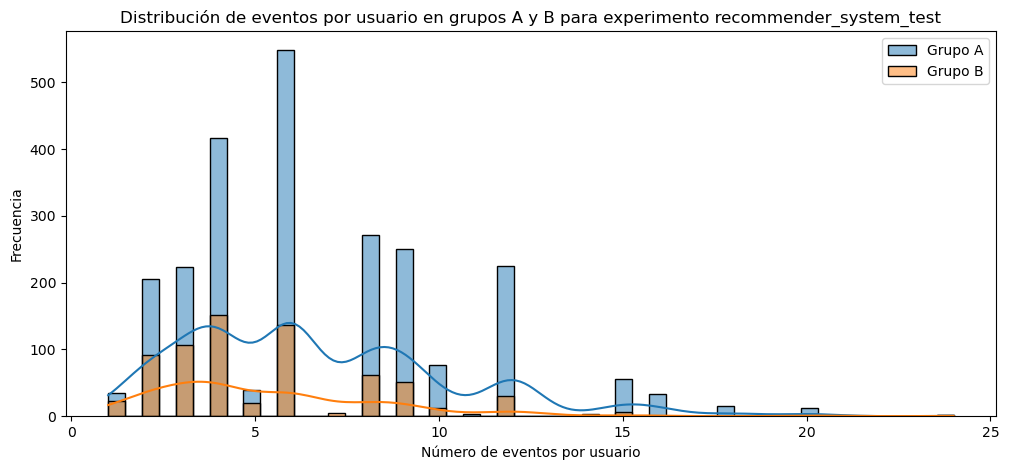

In [57]:
# Histograma de eventos por grupo para el experimento recommender_system_test
plt.figure(figsize=(12, 5))
sns.histplot(experiment_recommender[experiment_recommender['group']=='A']['event_count'], bins=50, alpha=0.5, label="Grupo A", kde=True)
sns.histplot(experiment_recommender[experiment_recommender['group']=='B']['event_count'], bins=50, alpha=0.5, label="Grupo B", kde=True)
plt.xlabel("Número de eventos por usuario")
plt.ylabel("Frecuencia")
plt.title("Distribución de eventos por usuario en grupos A y B para experimento recommender_system_test")
plt.legend()
plt.show()

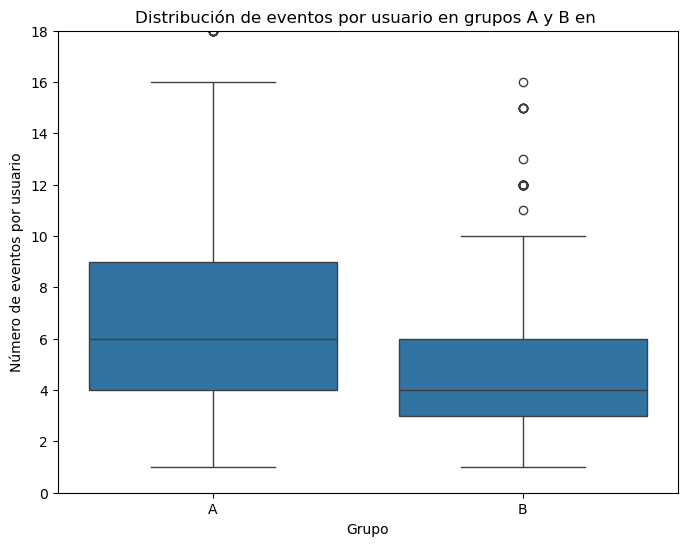

In [58]:
# Visualización con boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(x=experiment_recommender['group'], y=experiment_recommender['event_count'])
plt.xlabel("Grupo")
plt.ylabel("Número de eventos por usuario")
plt.title("Distribución de eventos por usuario en grupos A y B en ")
plt.ylim(0, experiment_recommender["event_count"].quantile(0.99))  # Limita los valores extremos para mejor visualización
plt.show()

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
En el análisis de las gráficas para el recommender_system_test, observamos que el grupo A, que es el grupo de control, tiene más usuarios y una mayor frecuencia de eventos por usuario en comparación con el grupo B. Esta tendencia se confirma al examinar el boxplot, donde se ve que la media del grupo A es mayor.

In [60]:
# Filtramos datos por experiento 'interface_eu_test'
experiment_interface_eu = events_per_user[events_per_user['ab_test'] == "interface_eu_test"]
experiment_interface_eu.head()

,user_id,group,ab_test,event_count
0,0002CE61FF2C4011,A,interface_eu_test,12
2,001E72F50D1C48FA,B,interface_eu_test,6
3,002412F1EB3F6E38,A,interface_eu_test,6
4,002540BE89C930FB,A,interface_eu_test,9
5,0031F1B5E9FBF708,B,interface_eu_test,4


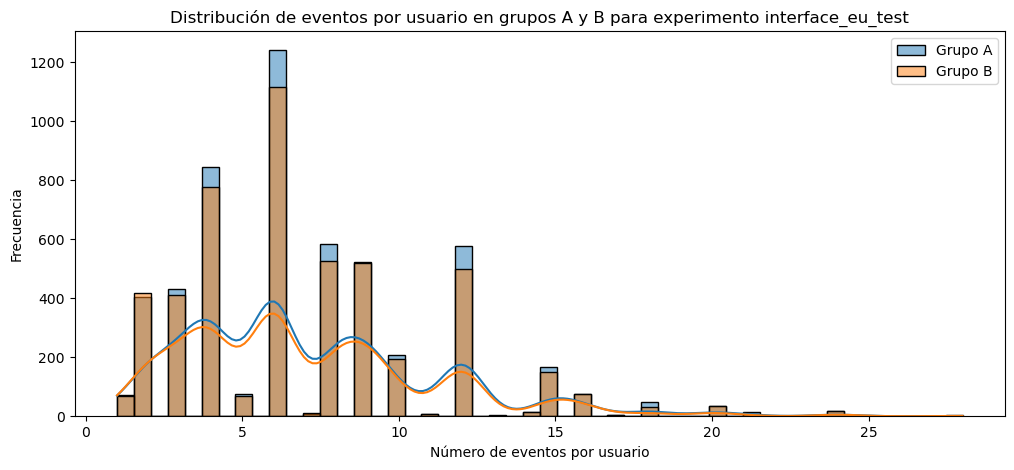

In [61]:
# Histograma de eventos por grupo para el experimento interface_eu_test
plt.figure(figsize=(12, 5))
sns.histplot(experiment_interface_eu[experiment_interface_eu['group']=='A']['event_count'], bins=50, alpha=0.5, label="Grupo A", kde=True)
sns.histplot(experiment_interface_eu[experiment_interface_eu['group']=='B']['event_count'], bins=50, alpha=0.5, label="Grupo B", kde=True)
plt.xlabel("Número de eventos por usuario")
plt.ylabel("Frecuencia")
plt.title("Distribución de eventos por usuario en grupos A y B para experimento interface_eu_test")
plt.legend()
plt.show()

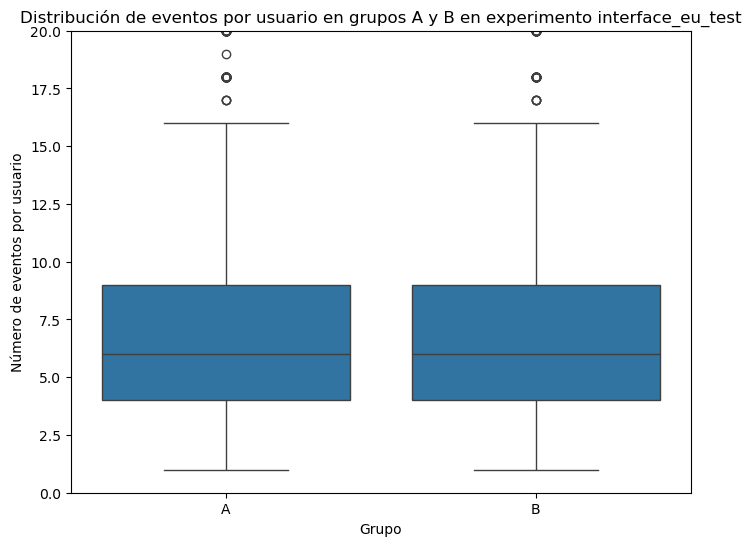

In [62]:
# Visualización con boxplots por grupo para el experimento interface_eu_test
plt.figure(figsize=(8, 6))
sns.boxplot(x=experiment_interface_eu['group'], y=experiment_interface_eu['event_count'])
plt.xlabel("Grupo")
plt.ylabel("Número de eventos por usuario")
plt.title("Distribución de eventos por usuario en grupos A y B en experimento interface_eu_test")
plt.ylim(0, experiment_interface_eu["event_count"].quantile(0.99))  # Limita los valores extremos para mejor visualización
plt.show()

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
La distribución de eventos por usuario en los grupos A y B del experimento interface_eu_test es similar, tanto en el histograma como en el boxplot, con medias y frecuencias comparables. 

Explicamos la comparación entre los grupos de ambos experimentos.

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
El número de eventos por usuario no está distribuido equitativamente entre las muestras. Aunque la distribución es más equilibrada en el grupo interface_eu_test, en el grupo recommender_system_test hay un desequilibrio notable, con una mayor concentración de eventos en el subgrupo A y una cantidad mucho menor en el subgrupo B. Esto podría indicar un sesgo en la asignación de eventos o una diferencia en el comportamiento de los usuarios entre los subgrupos.

#### Estudiaremos la conversión en las diferentes etapas del embudo.

In [67]:
# Definimos el orden de los eventos para el funnel de conversión, 
# de forma que cada evento se registre en una secuencia específica
event_order = ['login', 'product_page', 'product_cart', 'purchase']

# Convertimos la columna 'event_name' en una variable categórica con el orden definido en 
#'event_order' para asegurar que los eventos sean ordenados de manera correcta durante el análisis.
events_clean['event_name'] = pd.Categorical(events_clean['event_name'], 
                                            categories=event_order, ordered=True)

# Ordenamos los datos por 'ab_test', 'group', 'user_id' y 'event_name' 
# para organizar los eventos de manera cronológica por usuario y grupo
events_clean = events_clean.sort_values(['ab_test', 'group', 'user_id', 'event_name'])
events_clean.sample(5)

,user_id,group,ab_test,first_date,event_dt,event_name,details
85918,272928E46E4721AD,A,interface_eu_test,2020-12-17,2020-12-24,login,NaN
94905,02859E26F96B564C,A,interface_eu_test,2020-12-20,2020-12-23,login,NaN
79382,642E0822CA3627CB,B,interface_eu_test,2020-12-15,2020-12-15,product_cart,NaN
59638,5D4EA9BF9BA19AE3,A,interface_eu_test,2020-12-12,2020-12-22,product_cart,NaN
12668,6A2F87E0CD728315,A,recommender_system_test,2020-12-20,2020-12-20,purchase,4.99


In [68]:
# Agrupamos los datos para contar la cantidad de eventos en cada grupo de experimento 
# y cada tipo de evento
#funnel = events_clean.groupby(['ab_test', 'group', 'event_name']).size().reset_index(name='count')
funnel = events_clean.groupby(['ab_test', 'group', 'event_name'], observed=False
                             ).size().reset_index(name='count')

funnel

,ab_test,group,event_name,count
0,interface_eu_test,A,login,16290
1,interface_eu_test,A,product_page,10839
2,interface_eu_test,A,product_cart,5284
3,interface_eu_test,A,purchase,5825
4,interface_eu_test,B,login,14980
5,interface_eu_test,B,product_page,9811
6,interface_eu_test,B,product_cart,5093
7,interface_eu_test,B,purchase,5012
8,recommender_system_test,A,login,7204
9,recommender_system_test,A,product_page,4640


In [69]:
# Pivoteamos la tabla para tener los eventos como columnas, cada fila corresponde a un grupo de 
# experimento y los valores son los conteos de eventos, se rellena con 0 los eventos ausentes.
funnel_pivot = funnel.pivot_table(index=['ab_test', 'group'], columns='event_name', 
                                  values='count', fill_value=0)
funnel_pivot

C:\Users\rachel\AppData\Local\Temp\ipykernel_1612\2722100715.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  funnel_pivot = funnel.pivot_table(index=['ab_test', 'group'], columns='event_name',


event_name                       login  product_page  product_cart  purchase
ab_test                 group                                               
interface_eu_test       A      16290.0       10839.0        5284.0    5825.0
                        B      14980.0        9811.0        5093.0    5012.0
recommender_system_test A       7204.0        4640.0        2184.0    2233.0
                        B       1847.0         977.0         507.0     476.0

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
Se observa una diferencia importante en la cantidad de interacciones entre los grupos de cada prueba. Sin embargo, en el caso del recommender_system_test, que es el principal enfoque de este análisis, hay una diferencia notable entre el grupo de control (A) y el grupo B. Esto podría deberse a una distribución desigual de los usuarios entre los grupos, lo que afecta los resultados. Además, en el grupo de control (A), es evidente que el evento purchase tiene más interacciones que el evento product_cart. Esto podría sugerir que los usuarios, al navegar por la página de producto (product_page), se dirigen directamente a la compra sin pasar por el carrito de compras, lo que es un comportamiento común en ciertos contextos de compra en línea.

In [71]:
# Calculamos el porcentaje de conversión respecto al evento anterior
funnel_pivot['login_to_product_page %'] = ((funnel_pivot['product_page'] / funnel_pivot['login']) * 100).round(2)
funnel_pivot['product_page_to_product_cart %'] = ((funnel_pivot['product_cart'] / funnel_pivot['product_page']) * 100).round(2)
funnel_pivot['product_cart_to_purchase %'] = ((funnel_pivot['purchase'] / funnel_pivot['product_cart']) * 100).round(2)

# Reseteamos el índice para tener una tabla limpia
funnel_pivot = funnel_pivot.reset_index()

funnel_pivot

event_name,ab_test,group,login,product_page,product_cart,purchase,login_to_product_page %,product_page_to_product_cart %,product_cart_to_purchase %
0,interface_eu_test,A,16290.0,10839.0,5284.0,5825.0,66.54,48.75,110.24
1,interface_eu_test,B,14980.0,9811.0,5093.0,5012.0,65.49,51.91,98.41
2,recommender_system_test,A,7204.0,4640.0,2184.0,2233.0,64.41,47.07,102.24
3,recommender_system_test,B,1847.0,977.0,507.0,476.0,52.90,51.89,93.89


<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
Los porcentajes de conversión entre eventos muestran lo siguiente:
En interface_eu_test, el grupo A tiene una conversión del 66.54% de login a product_page, 48.75% de product_page a product_cart, y 110.24% de product_cart a purchase, lo que podría indicar compras repetidas. El grupo B muestra una conversión más baja en todas las etapas, excepto product_page_to_product_cart.
    
En recommender_system_test, el grupo A muestra 64.41% de conversión de login a product_page, 47.07% de product_page_to_product_cart y 102.24% de product_cart a purchase. El grupo B tiene una conversión más baja en todas las etapas excepto en product_page_to_product_cart. Esta mayor conversión en el paso de agregar al carrito, puede sugerir que sistema de recomendación funciona.


Generamos las gráficas para obtener una mejor visión de la información anterior.


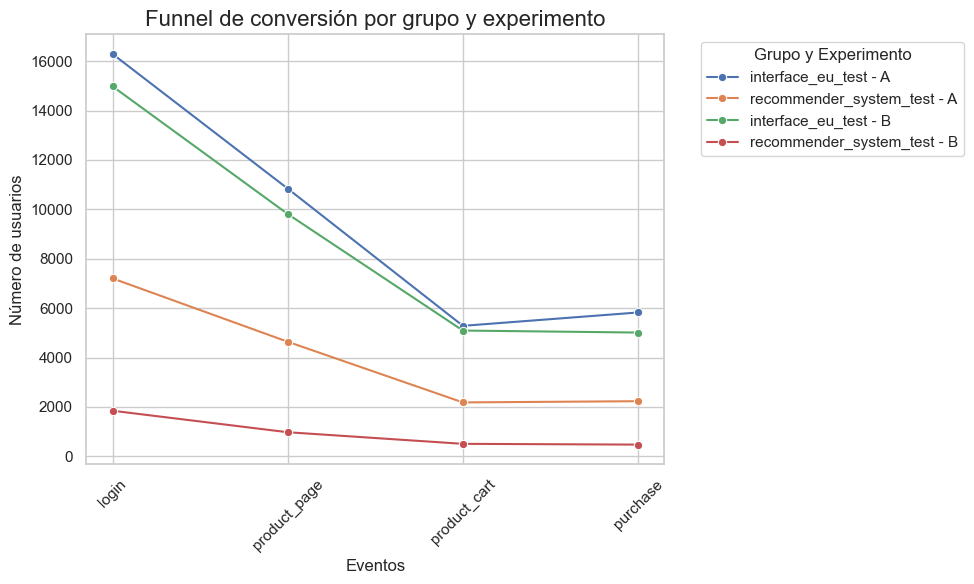

In [74]:
# Gráfica del funnel de conversión por grupo y experimento

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Definimos los pasos del funnel
steps = ['login', 'product_page', 'product_cart', 'purchase']

# Iteramos sobre cada grupo y experimento para graficar
for group in funnel_pivot['group'].unique():
    for ab_test in funnel_pivot['ab_test'].unique():
        # Filtramos los datos para el grupo y experimento actual
        data = funnel_pivot[(funnel_pivot['group'] == group) & (funnel_pivot['ab_test'] == ab_test)]
        
        # Obtenemos los conteos de eventos
        counts = data[steps].values.flatten()
        
        # Graficamos el funnel
        sns.lineplot(x=steps, y=counts, marker='o', label=f'{ab_test} - {group}', ax=ax)

# Añadimos etiquetas y título
ax.set_title('Funnel de conversión por grupo y experimento', fontsize=16)
ax.set_xlabel('Eventos', fontsize=12)
ax.set_ylabel('Número de usuarios', fontsize=12)
ax.legend(title='Grupo y Experimento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
Análsis de números absolutos:

    
Entre los grupos del experimento interface_eu_test no se observa una diferencia tan notable, aunque sí se percibe una caída en los eventos a medida que avanzan las etapas. Sin embargo, en el grupo A, el número de interacciones aumenta al llegar al evento purchase.

En el recommender_system_test, que es el experimento principal para este análisis, se observa una diferencia más marcada entre los grupos. En ambos grupos, se nota una disminución en el número de eventos a medida que avanzan en las etapas. Sin embargo, en el grupo B, la pérdida de eventos entre product_page y product_cart es menor, mientras que en el grupo A, la conversión de product_cart a purchase es más alta. Estas diferencias podrían estar relacionadas con la distribución desigual de usuarios entre los grupos, como se mencionó anteriormente.

#### ¿Cómo se distribuye el número de eventos entre los días?

In [77]:
# Agrupamos por experimento, grupo, evento y fecha, y contamos la cantidad de eventos
funnel_with_date = events_clean.groupby(['ab_test', 'group', 'event_name', 'event_dt']).size().reset_index(name='count')
funnel_with_date.sample(5)

C:\Users\rachel\AppData\Local\Temp\ipykernel_1612\4198163150.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  funnel_with_date = events_clean.groupby(['ab_test', 'group', 'event_name', 'event_dt']).size().reset_index(name='count')


,ab_test,group,event_name,event_dt,count
256,recommender_system_test,A,purchase,2020-12-21,263
88,interface_eu_test,B,login,2020-12-07,403
283,recommender_system_test,B,login,2020-12-27,28
16,interface_eu_test,A,login,2020-12-23,991
5,interface_eu_test,A,login,2020-12-12,759


In [78]:
# Pivoteamos la tabla para tener los eventos como columnas y la fecha como índice
funnel_with_date_pivot = funnel_with_date.pivot_table(index=['ab_test', 'group', 'event_dt'], columns='event_name', values='count', fill_value=0)

# Reordenamos las columnas según event_order
funnel_with_date_pivot = funnel_with_date_pivot[event_order]

funnel_with_date_pivot

C:\Users\rachel\AppData\Local\Temp\ipykernel_1612\3396561521.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  funnel_with_date_pivot = funnel_with_date.pivot_table(index=['ab_test', 'group', 'event_dt'], columns='event_name', values='count', fill_value=0)


event_name                                login  product_page  product_cart  \
ab_test                 group event_dt                                        
interface_eu_test       A     2020-12-07  433.0         291.0         125.0   
                              2020-12-08  480.0         331.0         138.0   
                              2020-12-09  484.0         326.0         155.0   
                              2020-12-10  526.0         355.0         177.0   
                              2020-12-11  532.0         365.0         180.0   
...                                         ...           ...           ...   
recommender_system_test B     2020-12-24   46.0          23.0          14.0   
                              2020-12-26   31.0          14.0           5.0   
                              2020-12-27   28.0          12.0           9.0   
                              2020-12-28   27.0          16.0           4.0   
                              2020-12-29   18.0           8.0           2.0   

event_name                                purchase  
ab_test                 group event_dt              
interface_eu_test       A     2020-12-07     148.0  
                              2020-12-08     165.0  
                              2020-12-09     168.0  
                              2020-12-10     194.0  
                              2020-12-11     199.0  
...                                            ...  
recommender_system_test B     2020-12-24      11.0  
                              2020-12-26       4.0  
                              2020-12-27       9.0  
                              2020-12-28       3.0  
                              2020-12-29       5.0  

[88 rows x 4 columns]

In [79]:
# Calcular el porcentaje de conversión respecto al evento anterior
funnel_with_date_pivot['login_to_product_page %'] = ((funnel_with_date_pivot['product_page'] / funnel_with_date_pivot['login']) * 100).round(2)
funnel_with_date_pivot['product_page_to_product_cart %'] = ((funnel_with_date_pivot['product_cart'] / funnel_with_date_pivot['product_page']) * 100).round(2)
funnel_with_date_pivot['product_cart_to_purchase %'] = ((funnel_with_date_pivot['purchase'] / funnel_with_date_pivot['product_cart']) * 100).round(2)

# Reseteamos el índice para tener una tabla limpia
funnel_with_date_pivot = funnel_with_date_pivot.reset_index()

# Mostramos el resultado final
funnel_with_date_pivot.sample(6)
funnel_with_date_pivot

event_name,ab_test,group,event_dt,login,product_page,product_cart,purchase,login_to_product_page %,product_page_to_product_cart %,product_cart_to_purchase %
0,interface_eu_test,A,2020-12-07,433.0,291.0,125.0,148.0,67.21,42.96,118.40
1,interface_eu_test,A,2020-12-08,480.0,331.0,138.0,165.0,68.96,41.69,119.57
2,interface_eu_test,A,2020-12-09,484.0,326.0,155.0,168.0,67.36,47.55,108.39
3,interface_eu_test,A,2020-12-10,526.0,355.0,177.0,194.0,67.49,49.86,109.60
4,interface_eu_test,A,2020-12-11,532.0,365.0,180.0,199.0,68.61,49.32,110.56
...,...,...,...,...,...,...,...,...,...,...
83,recommender_system_test,B,2020-12-24,46.0,23.0,14.0,11.0,50.00,60.87,78.57
84,recommender_system_test,B,2020-12-26,31.0,14.0,5.0,4.0,45.16,35.71,80.00
85,recommender_system_test,B,2020-12-27,28.0,12.0,9.0,9.0,42.86,75.00,100.00
86,recommender_system_test,B,2020-12-28,27.0,16.0,4.0,3.0,59.26,25.00,75.00


C:\Users\rachel\AppData\Local\Temp\ipykernel_1612\519721918.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=funnel_long, x='event_dt', y='num_events', hue='event_name',


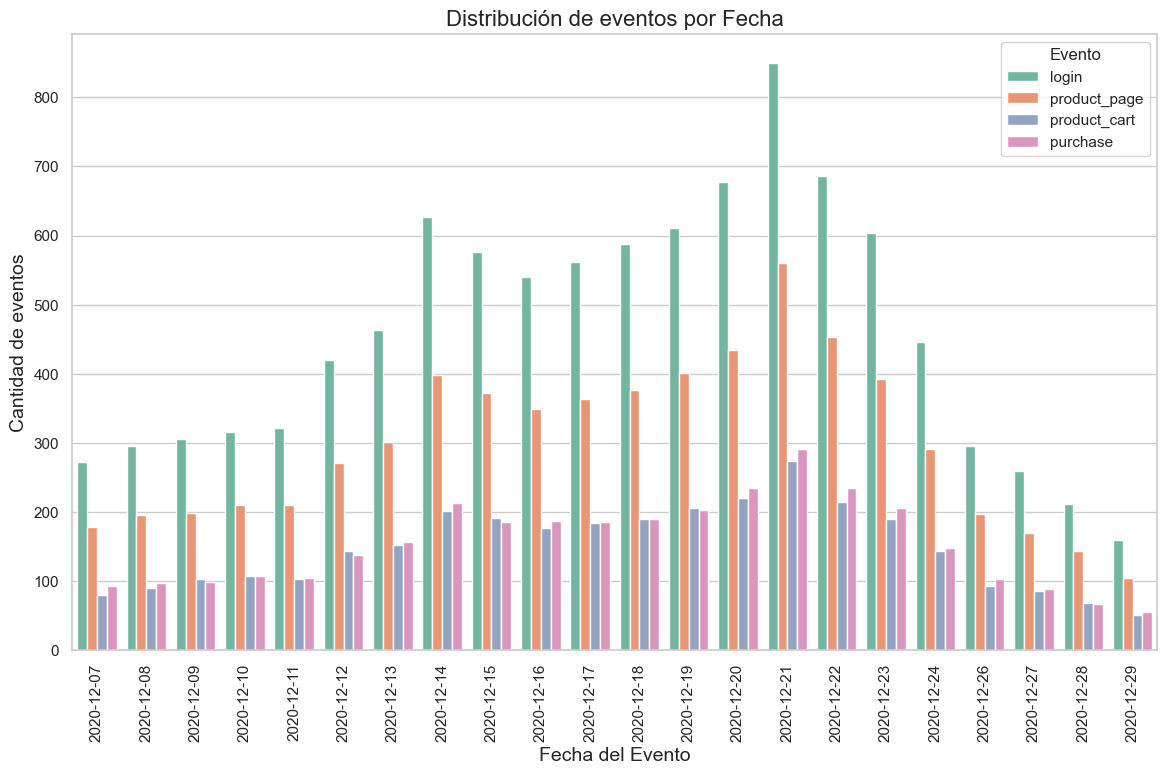

In [80]:
# Usaremos melt para transformar la tabla de eventos en formato largo
funnel_long = funnel_with_date_pivot.melt(id_vars=['ab_test', 'group', 'event_dt'], value_vars=event_order,
                                          var_name='event_name', value_name='num_events')

# Graficamos las conversiones para cada evento
plt.figure(figsize=(14, 8))

sns.barplot(data=funnel_long, x='event_dt', y='num_events', hue='event_name', 
            ci=None, palette='Set2')

# Añadimos etiquetas y título
plt.title('Distribución de eventos por Fecha', fontsize=16)
plt.xlabel('Fecha del Evento', fontsize=14)
plt.ylabel('Cantidad de eventos', fontsize=14)
plt.xticks(rotation=90)  # Rotar las fechas para mayor claridad
plt.legend(title='Evento', loc='upper right')
plt.show()

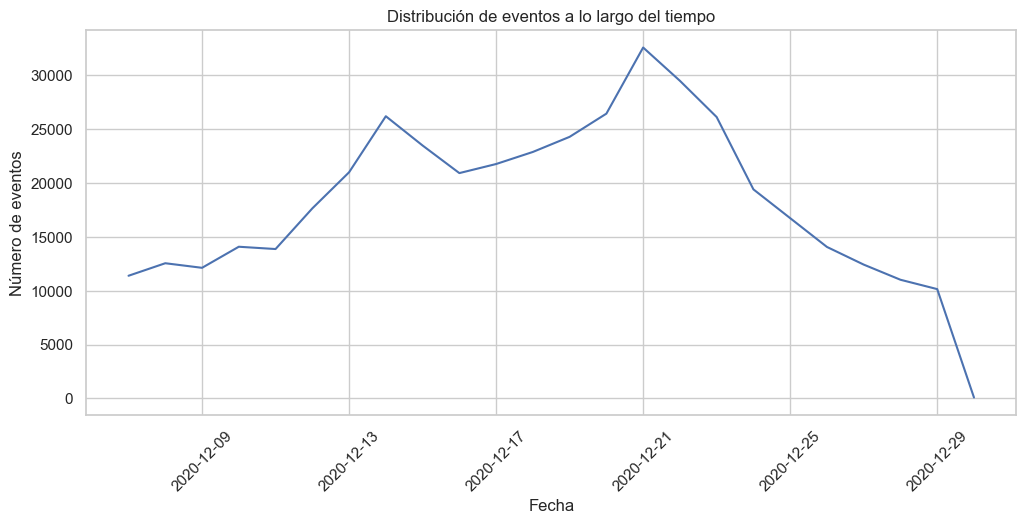

In [81]:
# Distribución de eventos por día: agrupamos los eventos por fecha, contando la cantidad de eventos por cada día.
daily_events = events.groupby('event_dt').size()

# Graficamos la istribución de eventos por día
plt.figure(figsize=(12, 5))
sns.lineplot(x=daily_events.index, y=daily_events.values)
plt.xlabel('Fecha')
plt.ylabel('Número de eventos')
plt.title('Distribución de eventos a lo largo del tiempo')
plt.xticks(rotation=45)
plt.show()

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
Se puede observar cómo el número de eventos aumenta, alcanzando su punto máximo el día 21, que fue el último día en que los usuarios podían registrarse en la tienda en línea. Después de este día, se nota una caída considerable en los eventos. La caída podría deberse al cierre de la oportunidad de registro, lo que reduce la motivación o el interés de los usuarios para seguir interactuando con la tienda en línea.

Ahora analizaremos la distribución diaria de los eventos en cada experimento.

In [84]:
# Usamos melt para transformar la tabla a formato largo, seleccionando los datos de 
#'recommender_system_test' y organizando los eventos y conversiones en columnas separadas.
funnel_long = funnel_with_date_pivot[funnel_with_date_pivot['ab_test'] == 'recommender_system_test'].melt(id_vars=['ab_test', 'group', 'event_dt'], value_vars=event_order,
              var_name='event_name', value_name='num_events')
funnel_long.sample(5)

,ab_test,group,event_dt,event_name,num_events
148,recommender_system_test,A,2020-12-23,purchase,115.0
88,recommender_system_test,A,2020-12-07,product_cart,30.0
123,recommender_system_test,B,2020-12-20,product_cart,27.0
57,recommender_system_test,A,2020-12-20,product_page,387.0
82,recommender_system_test,B,2020-12-23,product_page,32.0


C:\Users\rachel\AppData\Local\Temp\ipykernel_1612\3412384809.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=funnel_long, x='event_dt', y='num_events', hue='event_name',


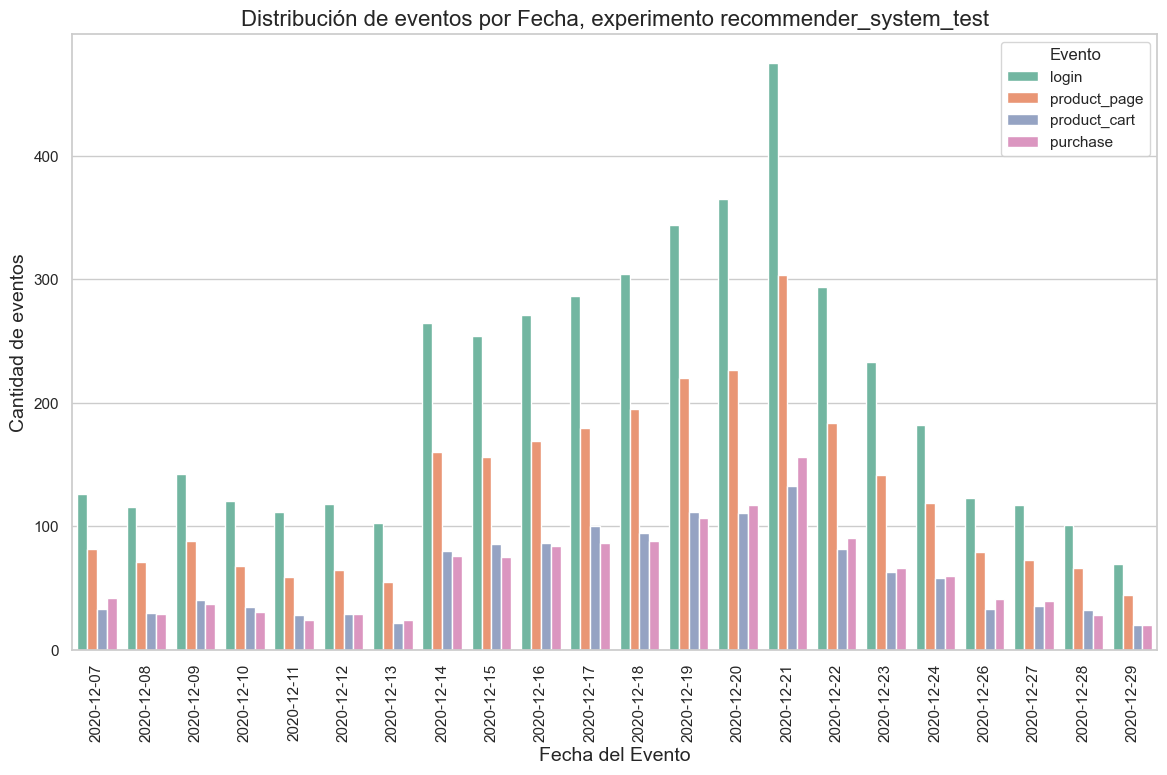

In [85]:
# Graficamos conversiones por Evento y Fecha del experimento recommender_system_test
plt.figure(figsize=(14, 8))
sns.barplot(data=funnel_long, x='event_dt', y='num_events', hue='event_name', 
            ci=None, palette='Set2')
plt.title('Distribución de eventos por Fecha, experimento recommender_system_test', 
          fontsize=16)
plt.xlabel('Fecha del Evento', fontsize=14)
plt.ylabel('Cantidad de eventos', fontsize=14)
plt.xticks(rotation=90)  # Rotar las fechas para mayor claridad
plt.legend(title='Evento', loc='upper right')
plt.show()

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
En esta gráfica, se nota un incremento relativamente constante particularmente después del 13 de diciembre, seguido de una caída después del 21 de diciembre. Similar a lo que se observa en la gráfica generalizada.

In [87]:
# Usamos melt para transformar la tabla a formato largo, seleccionando los datos de 
#'interface_eu_test' y organizando los eventos y conversiones en columnas separadas.
funnel_long = funnel_with_date_pivot[funnel_with_date_pivot['ab_test'] == 'interface_eu_test'].melt(id_vars=['ab_test', 'group', 'event_dt'], value_vars=event_order,
                                          var_name='event_name', value_name='num_events')
funnel_long.sample(5)

,ab_test,group,event_dt,event_name,num_events
103,interface_eu_test,A,2020-12-22,product_cart,336.0
167,interface_eu_test,B,2020-12-20,purchase,310.0
75,interface_eu_test,B,2020-12-16,product_page,476.0
92,interface_eu_test,A,2020-12-11,product_cart,180.0
138,interface_eu_test,A,2020-12-13,purchase,301.0


C:\Users\rachel\AppData\Local\Temp\ipykernel_1612\173603493.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=funnel_long, x='event_dt', y='num_events', hue='event_name', ci=None, palette='Set2')


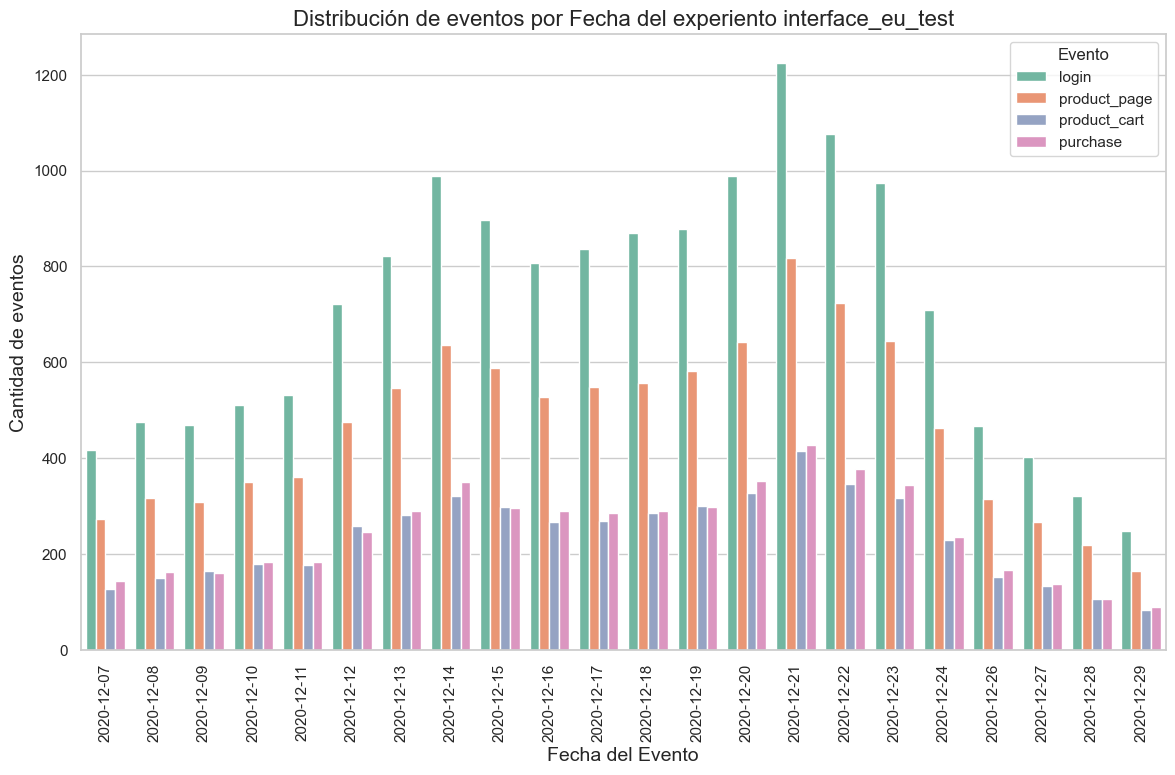

In [88]:
# Graficamos conversiones por Evento y Fecha del experimento interface_eu_test
plt.figure(figsize=(14, 8))

sns.barplot(data=funnel_long, x='event_dt', y='num_events', hue='event_name', ci=None, palette='Set2')

# Añadimos etiquetas y título
plt.title('Distribución de eventos por Fecha del experiento interface_eu_test', 
           fontsize=16)
plt.xlabel('Fecha del Evento', fontsize=14)
plt.ylabel('Cantidad de eventos', fontsize=14)
plt.xticks(rotation=90)  # Rotar las fechas para mayor claridad
plt.legend(title='Evento', loc='upper right')
plt.show()

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
En esta gráfica el incremento es un poco más sostenido y la caída en los eventos es menos drástica en comparación con el experimento anterior. Lo que sugiere un comportamiento más leal de los participantes de este experimento.

####  Prueba z para comprobar la diferencia estadística entre las proporciones

Ahora realizaremos la prueba Z para analizar las diferencias entre los eventos de cada grupo en el experimento recommender_system_test.

In [92]:
# Función para realizar la prueba Z
def perform_ztest(control_evento_anterior, control_evento_posterior, prueba_evento_anterior, prueba_evento_posterior):
    posteriores = np.array([control_evento_posterior, prueba_evento_posterior])
    anteriores = np.array([control_evento_anterior, prueba_evento_anterior])
    z_stat, p_value = proportions_ztest(posteriores, anteriores)
    return z_stat, p_value

In [93]:
# Eventos a comparar
event_to_compare = [
    ('login', 'product_page'),
    ('product_page', 'product_cart'),
    ('product_cart', 'purchase')
]

# Para cada par de eventos, realizamos la prueba Z
for event_from, event_to in event_to_compare:
    print(f"Comparando '{event_from}' a '{event_to}':")
    
    # Para grupo A
    control_evento_posterior = funnel_pivot.loc[
        (funnel_pivot['ab_test'] == 'recommender_system_test') & 
        (funnel_pivot['group'] == 'A'), event_to].sum()
    
    control_evento_anterior = funnel_pivot.loc[
        (funnel_pivot['ab_test'] == 'recommender_system_test') & 
        (funnel_pivot['group'] == 'A'), event_from].sum()

    # Para grupo B
    prueba_evento_posterior = funnel_pivot.loc[
        (funnel_pivot['ab_test'] == 'recommender_system_test') & 
        (funnel_pivot['group'] == 'B'), event_to].sum()
    prueba_evento_anterior = funnel_pivot.loc[
        (funnel_pivot['ab_test'] == 'recommender_system_test') & 
        (funnel_pivot['group'] == 'B'), event_from].sum()

    # Realizamos la prueba Z
    z_stat, p_value = perform_ztest(control_evento_anterior, control_evento_posterior, prueba_evento_anterior, prueba_evento_posterior)

    # Imprimimos los resultados
    print(f"Prueba Z para '{event_from}' a '{event_to}' (recommender_system_test): Z = {z_stat:.2f}, p-valor = {p_value:.4f}")

    # Interpretación
    if p_value < 0.05:
        print("La diferencia es estadísticamente significativa.\n")
    else:
        print("La diferencia no es estadísticamente significativa.\n")


Comparando 'login' a 'product_page':
Prueba Z para 'login' a 'product_page' (recommender_system_test): Z = 9.10, p-valor = 0.0000
La diferencia es estadísticamente significativa.

Comparando 'product_page' a 'product_cart':
Prueba Z para 'product_page' a 'product_cart' (recommender_system_test): Z = -2.74, p-valor = 0.0061
La diferencia es estadísticamente significativa.

Comparando 'product_cart' a 'purchase':
Prueba Z para 'product_cart' a 'purchase' (recommender_system_test): Z = nan, p-valor = nan
La diferencia no es estadísticamente significativa.



C:\Users\rachel\anaconda3\Lib\site-packages\statsmodels\stats\proportion.py:1024: RuntimeWarning: invalid value encountered in sqrt
  std_diff = np.sqrt(var_)


Como vemos en la celda anterior, para el caso de 'product_cart' a 'purchase' no podemos calcular la prueba Z, pues obtenemos un denominador no definido.

Consideremos la siguiente definición:

$$
Z = \frac{{p_1 - p_2}}{{\sqrt{p(1 - p) \left( \frac{1}{n_1} + \frac{1}{n_2} \right)}}}
$$

Donde:
- \( p_1 \) y \( p_2 \) son las proporciones observadas de los dos grupos.
- \( p \) es la proporción combinada de los dos grupos (calculada como \( p = \frac{X_1 + X_2}{n_1 + n_2} \)).
- \( n_1 \) y \( n_2 \) son los tamaños de las muestras de los dos grupos.

En el caso particular que estamos analizando, P es mayor que 1, es decir la conversión general de ambos grupos es mayor a 100% debido a que la conversión del grupo A también lo es y no es posible usar la prueba Z.

Para solventar este inconveniente decidimos topar la conversión del grupo A a 100% obteniendo los resultados siguientes:

In [172]:
z_stat, p_value = proportions_ztest([2184.0, 476.0] , [2184.0, 507.0])

# Imprimimos los resultados
print(f"Prueba Z para  'product_cart' a 'purchase' (recommender_system_test): Z = {z_stat:.2f}, p-valor = {p_value:.4f}")


# Interpretación

if p_value < 0.05:
    print("La diferencia es estadísticamente significativa.\n")
else:
    print("La diferencia no es estadísticamente significativa.\n")


Prueba Z para  'product_cart' a 'purchase' (recommender_system_test): Z = 11.62, p-valor = 0.0000
La diferencia es estadísticamente significativa.



<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
En el experimento recommender_system_test, las diferencias entre todos los eventos es significativa. Siendo que 'login' a 'product_page' y 'product_cart' a 'purchase' le va mejor al grupo de control y en el caso de 'product_page' a 'product_cart' le va mejor en el grupo de prueba. Lo cual suguiere que nuevo sistema de recomendación es efectivo para hacer que los usuarios agreguen al carrito, pero no necesariamente para que los compren.

#### **Conclusión General (Análisis de ambos experimentos)**

##### Calidad de los datos:
- Ambos experimentos contaban con datos bien estructurados, con nombres de columnas claros y en minúsculas, lo que facilitó su manipulación y análisis.
  
- Se corrigieron los formatos de fecha y se revisó la inexistencia de valores nulos y duplicados, asegurando la integridad de los datos.
  
- Se identificaron y eliminaron usuarios que participaron en ambos grupos (A y B) y experimentos, para minimizar posibles sesgos.  

##### Distribución de eventos y usuarios:
- En el experimento **interface_eu_test**, la distribución de eventos por usuario fue similar entre los grupos A y B, con medias y frecuencias comparables.
  
- En el experimento **recommender_system_test**, se observó una distribución desigual, con el grupo A mostrando una mayor frecuencia de eventos por usuario en comparación con el grupo B.  

##### Conversión en el embudo:
- En **interface_eu_test**, el grupo A mostró una conversión más alta en todas las etapas del embudo, excepto en la etapa de `product_page` a `product_cart`, donde el grupo B tuvo un ligero aumento.
  
- En **recommender_system_test**, el grupo A mostró una conversión más alta en las etapas de `login` a `product_page` y de `product_cart` a `purchase`. Sin embargo, el grupo B tuvo una mayor conversión solo en la etapa de `product_page` a `product_cart`, lo que sugiere que el nuevo sistema de recomendaciones influyó positivamente en esta etapa.  

##### Comportamiento temporal:
- En ambos experimentos, el número de eventos alcanzó su punto máximo el 21 de diciembre, coincidiendo con el último día de registro, y luego disminuyó drásticamente.
  
- En **recommender_system_test**, la caída en los eventos fue menos pronunciada en el grupo B, lo que sugiere un comportamiento más leal por parte de los usuarios expuestos al nuevo sistema de recomendaciones.  

#### ¿Qué opinamos sobre los resultados de la prueba A/B con respecto a la prueba recommender_system_test?

El nuevo sistema de recomendaciones (grupo B) mostró un impacto positivo en la etapa de `product_page` a `product_cart`, lo que sugiere que las recomendaciones mejoradas pueden motivar a los usuarios a agregar más productos al carrito. Sin embargo, este efecto no se tradujo en un aumento significativo en las compras (`purchase`), lo que indica que el sistema de recomendaciones podría necesitar ajustes para influir en la decisión final de compra.

Además, la distribución desigual de usuarios y eventos entre los grupos A y B podría haber afectado los resultados. Sería recomendable realizar una nueva prueba con una asignación más equilibrada de usuarios y un período de prueba más largo para obtener conclusiones más robustas.

En resumen, aunque el nuevo sistema de recomendaciones mostró potencialuna tas eapas del embudo, **no cumplió con el objetivo** de aumentar la conversión en un 10% en todas las etapas. Por lo tanto, **no se recomienda** implementar el sistema en su estado actual, pero sí se sugiere realizar mejoras y pruebas adicionales para optimizar su efectividad.